# Prediction of Diabetes using the Machine Learning

For the prediction of Diabetes,we have taken dataset from Pima India Diabetes Database.

Data set link:- https://www.kaggle.com/uciml/pima-indians-diabetes-database

The Pima Indian Diabetes Database is from National Institute of Diabetes and Digestive and Kidney Diseases. It consists of nine variables, out of which 'outcome' is the target variable. The objective of this dataset is to aid in predicting if a person is likely to have Diabetes or not.
                                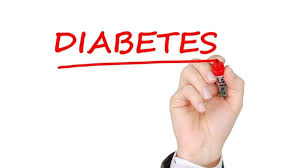

Data Description

Predictor Variables

1. Preganancies - Number of times the patient got pregnant
2. Glucose - Plasma glucose concentration
3. Blood Preassure - Diastolic Blood Preassure (mmHg)
4. Skin Thickness - Triceps skin fold thickness (mm)
5. Insulin - 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Collection

In [2]:
data=pd.read_csv('diabetes.csv') #Loading the dataset

In [3]:
data.head(10) #shows first 10 rows of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.tail() #last 5 rows of our dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Data Exploration

In [5]:
data.info() #shows columns,datatype and shows the data which is null and not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.shape #it has 768 rows of data and 9 columns

(768, 9)

In [7]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [8]:
data.describe() #it describes the overall features of each row of our dataset. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* 0-Patient is non-diabetic
* 1-Patient is diabetic

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

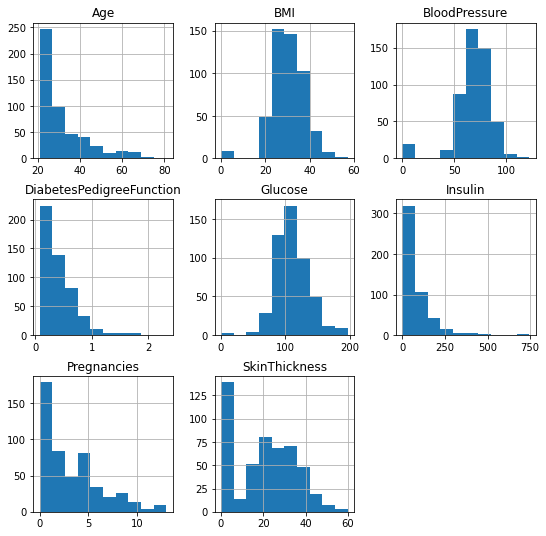

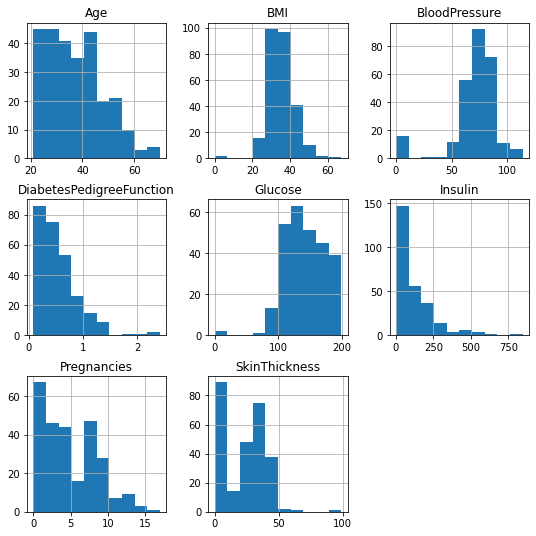

In [9]:
data.groupby('Outcome').hist(figsize=(9, 9))

* In this dataset,we can find that no of non-diabetic patients are more than diabetic patients

## Detecting Missing values and its treatment

The following values in a data set are considered to be missing values -

1. Blank Values
2. NaN
3. null
4. Some countinuous columns might have 0's to indicate missing data.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


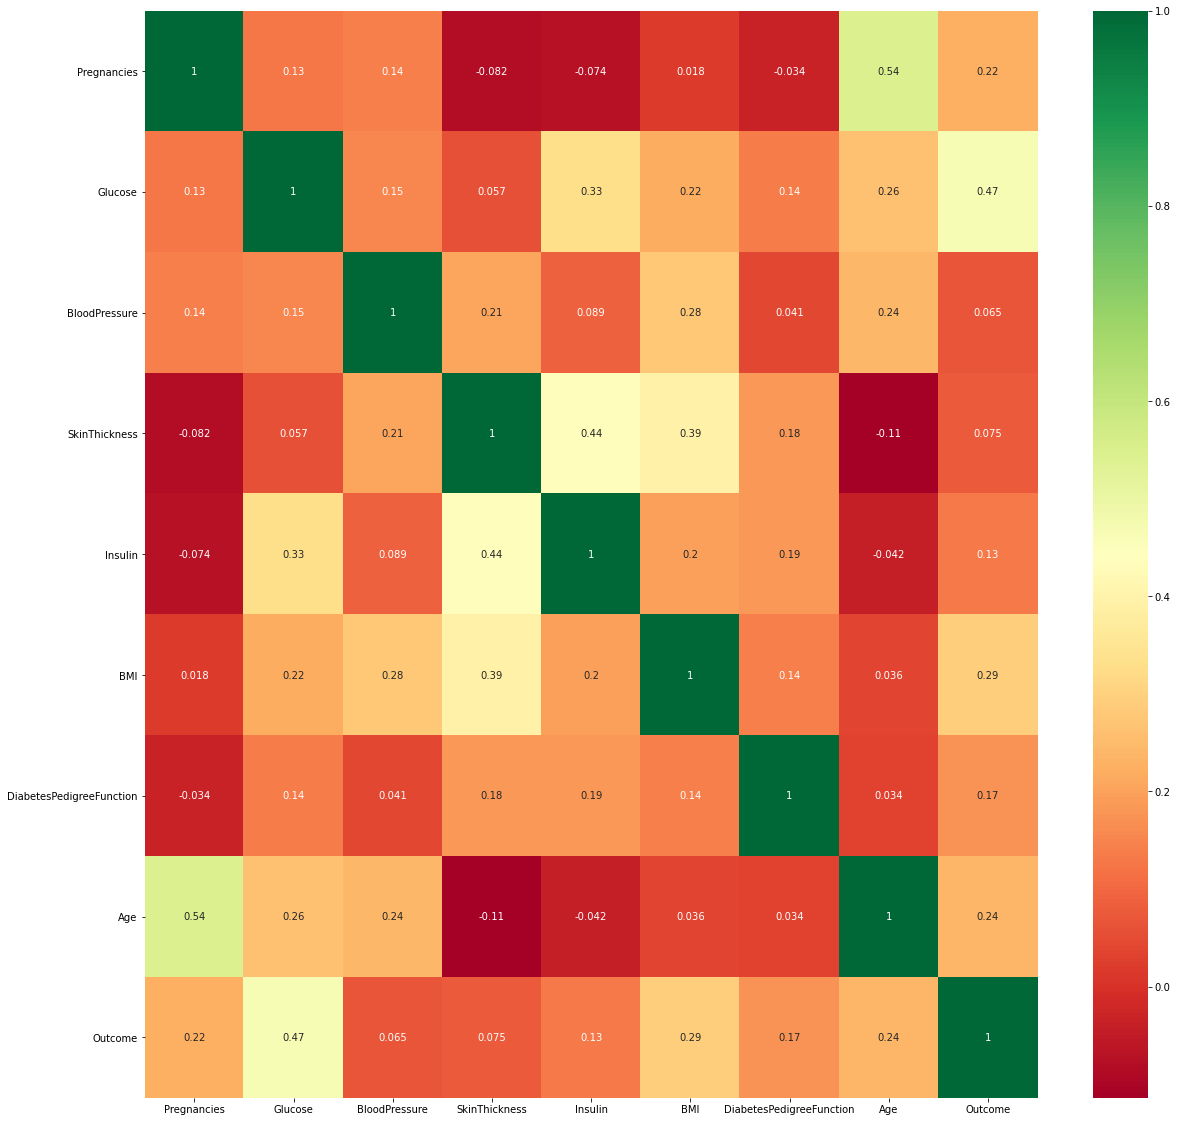

In [13]:
#this step is to get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

* But,we can't have insulin value as zero for our prediction model.So,we here replace all the zeros with Nan values and then try to try to model our data.

In [14]:
from numpy import nan
data['Glucose']=data['Glucose'].replace(0,np.nan)
data['BloodPressure']=data['BloodPressure'].replace(0,np.nan)
data['SkinThickness']=data['SkinThickness'].replace(0,np.nan)
data['Insulin']=data['Insulin'].replace(0,np.nan)
data['BMI']=data['BMI'].replace(0,np.nan)

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
data.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [17]:
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


* Here in SkinThickness column,we have more than 200 missing values and in Insulin column.
* So,in order to treat the missing values,we will fill all the Nan and null values with the mean 

In [18]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [20]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Here, as we can see that we have filled all the null and Nan values with mean and not even a single value is null

## Data Preprocessing

After treating the missing values,we will now push our data into preprocessing in order to enhance the performance of our model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [22]:
#seperating dependent and independent columns

X = data.drop(['Outcome'],axis=1)
y = data.iloc[:,-1]


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

print("X_train size:", X_train.shape)
print("y_train size: ",y_train.shape,"\n")
print("X_test size:", X_test.shape)
print("y_test size:",y_test.shape)

X_train size: (614, 8)
y_train size:  (614,) 

X_test size: (154, 8)
y_test size: (154,)


In [24]:
#standard scaling

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
sc

StandardScaler()

In [26]:
X_train

array([[ 0.90832902,  0.93627156,  0.44607305, ...,  0.36809107,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.81645845, -1.05366073, ..., -0.6335268 ,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.43232723,  1.44589558, ...,  2.81490046,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.91566959, -0.63706802, ..., -1.13433574,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.21330299,  0.11279888, ..., -0.36165909,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47328628,  0.77934723, ..., -0.0468649 ,
         0.52121586,  2.94889395]])

In [27]:
X_test

array([[-0.89295432,  2.48505495,  0.36797839, ...,  1.75798524,
         2.78935129, -0.93064283],
       [-0.56553774, -0.47180508,  0.20642998, ...,  0.28928871,
        -0.27698825, -0.83598035],
       [ 0.08929543, -1.46813834, -0.76286054, ...,  0.35245845,
        -0.31725331, -0.64665539],
       ...,
       [ 0.08929543,  0.65308732,  1.17572049, ...,  1.93170204,
         0.4694641 , -0.93064283],
       [-0.23812115, -0.18254703,  0.20642998, ..., -0.8635591 ,
        -1.19689011, -0.74131787],
       [-0.89295432, -0.47180508,  0.04488156, ..., -0.15289949,
         1.01459113, -0.74131787]])

## Outlier Prediction

Boxplots are a great way of detecting outliers. Once the outliers have been detected, they can be imputed with the 5th and 95th percentiles.

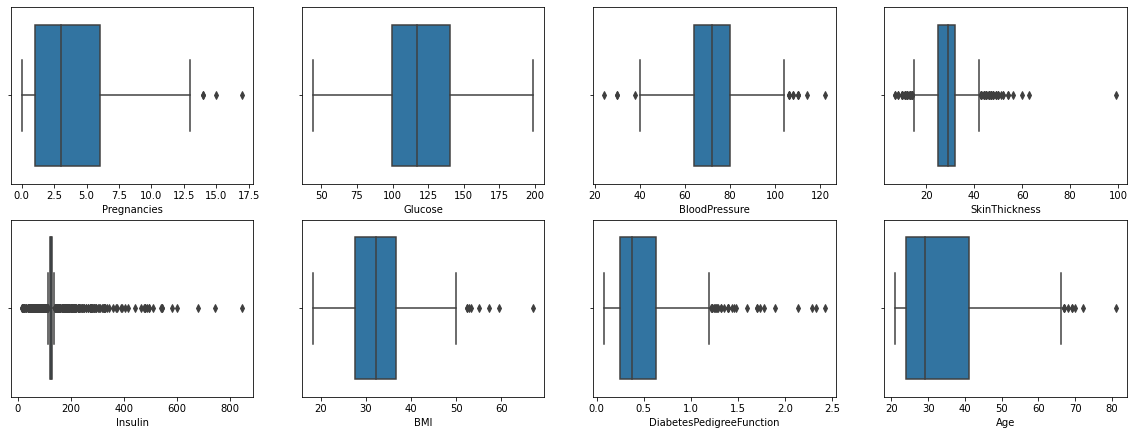

In [28]:
# Outlier detection using boxplots 
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(X['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(X['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(X['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(X['SkinThickness'])


plt.subplot(4,4,5)
sns.boxplot(X['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(X['BMI'])

plt.subplot(4,4,7)
sns.boxplot(X['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(X['Age'])

In [29]:
X['Pregnancies']=X['Pregnancies'].clip(lower=X['Pregnancies'].quantile(0.05), upper=X['Pregnancies'].quantile(0.95))
X['BloodPressure']=X['BloodPressure'].clip(lower=X['BloodPressure'].quantile(0.05), upper=X['BloodPressure'].quantile(0.95))
X['SkinThickness']=X['SkinThickness'].clip(lower=X['SkinThickness'].quantile(0.05), upper=X['SkinThickness'].quantile(0.95))
X['Insulin']=X['Insulin'].clip(lower=X['Insulin'].quantile(0.05), upper=X['Insulin'].quantile(0.95))
X['BMI']=X['BMI'].clip(lower=X['BMI'].quantile(0.05), upper=X['BMI'].quantile(0.95))
X['DiabetesPedigreeFunction']=X['DiabetesPedigreeFunction'].clip(lower=X['DiabetesPedigreeFunction'].quantile(0.05), upper=X['DiabetesPedigreeFunction'].quantile(0.95))
X['Age']=X['Age'].clip(lower=X['Age'].quantile(0.05), upper=X['Age'].quantile(0.95))

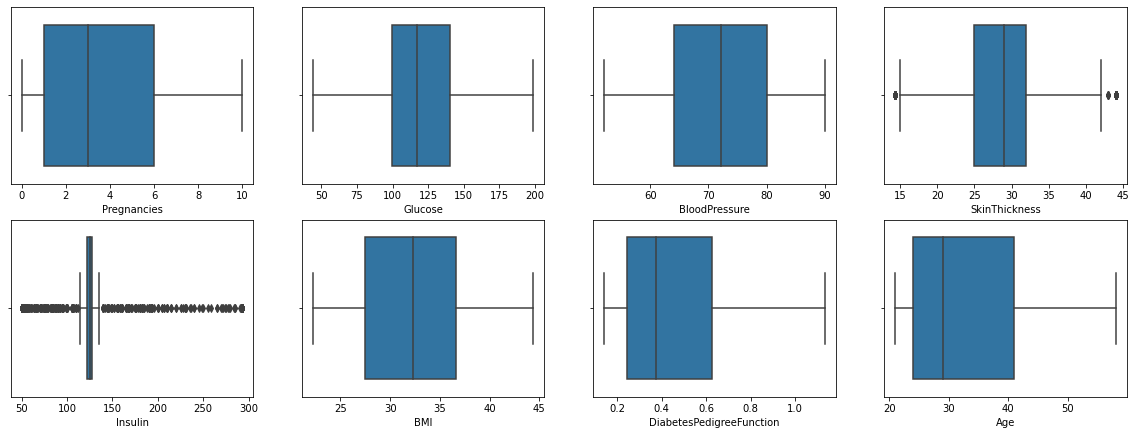

In [30]:
# Lets visualise the boxplots after imputing the outliers 
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(X['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(X['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(X['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(X['SkinThickness'])


plt.subplot(4,4,5)
sns.boxplot(X['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(X['BMI'])

plt.subplot(4,4,7)
sns.boxplot(X['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(X['Age'])

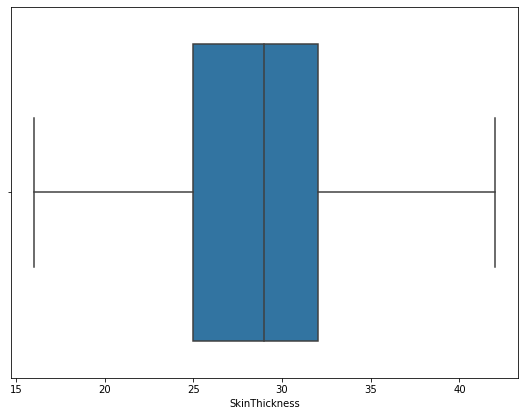

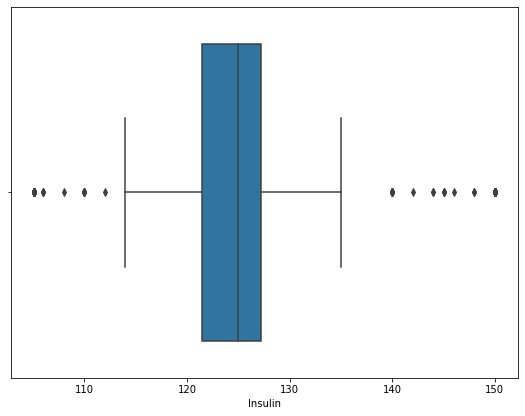

In [31]:
# As we can see, there are still outliers in columns Skin Thickness and Insulin. Lets try manipulating the percentile values.
X['SkinThickness']=X['SkinThickness'].clip(lower=X['SkinThickness'].quantile(0.07), upper=X['SkinThickness'].quantile(0.93))
X['Insulin']=X['Insulin'].clip(lower=X['Insulin'].quantile(0.21), upper=X['Insulin'].quantile(0.80))
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
sns.boxplot(X['SkinThickness'])
plt.figure(figsize= (20,15))
plt.subplot(2,2,2)
sns.boxplot(X['Insulin'])

## Data Visualization

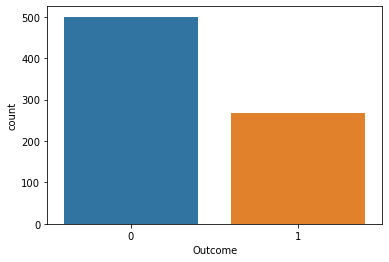

In [32]:
sns.countplot(y)


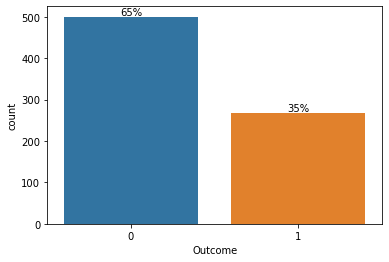

In [33]:
total=float(len(X))
ax = sns.countplot(y) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center") 

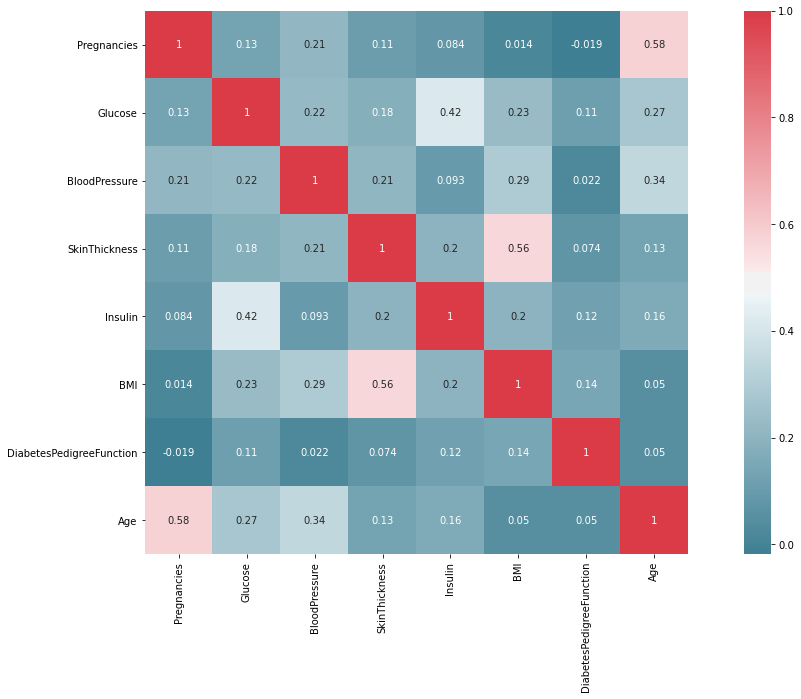

In [34]:
f, ax = plt.subplots(figsize=(20, 10))
corr = X.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [35]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## Model Selection

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [40]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ABC', AdaBoostClassifier()))



In [41]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.779221
1  SVC  0.779221
2   LR  0.811688
3   DT  0.740260
4  GNB  0.792208
5   RF  0.811688
6   GB  0.798701
7  ABC  0.818182


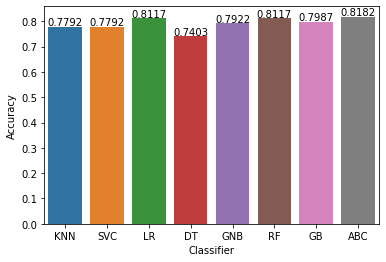

In [42]:
axis=sns.barplot(x=names,y=scores,data=X)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")
plt.show()

## Output

1. To build our model,we used 8 algorithms,out of which almost every model gave an accuracy of nearly 75 percent.
2. Out of these,Logistic Regression and AdaBoostClassifier gave an accuracy of nearly 81%.
3. We can use these 2 algorithms for our further process. 